In [1]:
import joblib
import pandas as pd
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

<Axes: >

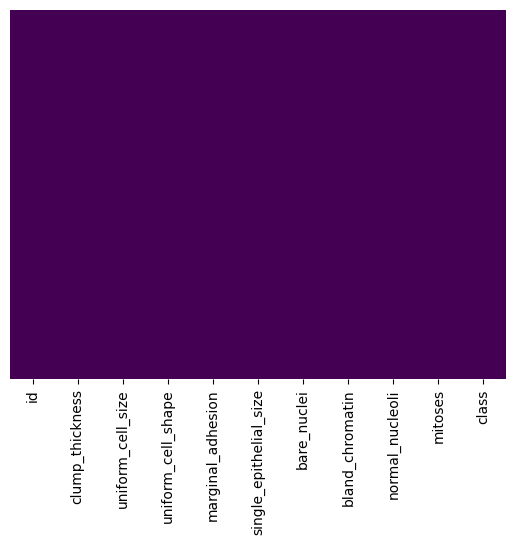

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: >

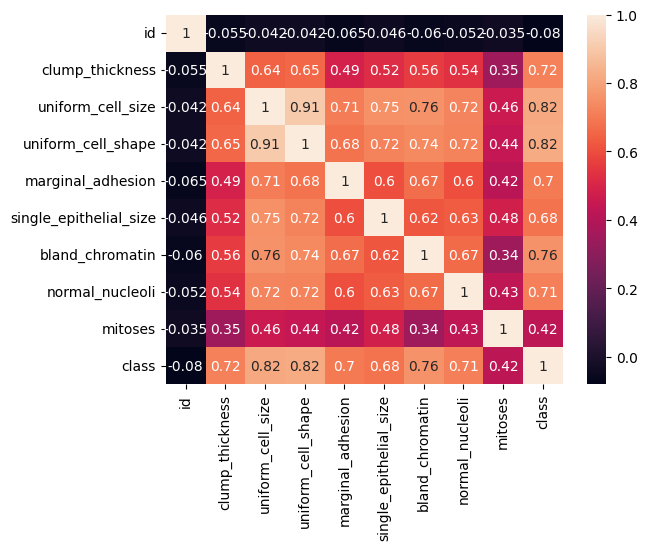

In [7]:
df2 = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df2.corr(),annot=True,cmap=None)

In [9]:
df.drop(['id'],axis=1,inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [15]:
df['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

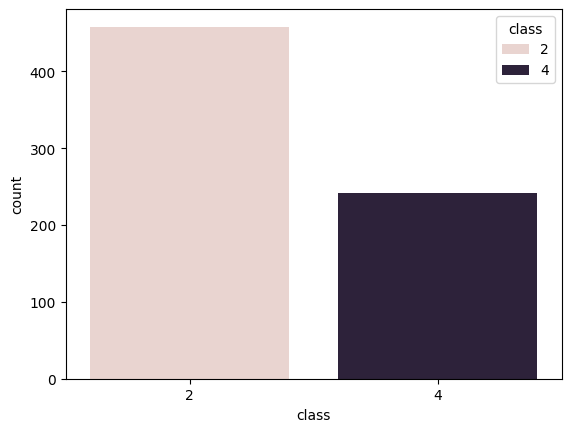

In [14]:
sns.countplot(data=df,x="class",hue="class")

In [16]:
df['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [17]:
df[df['bare_nuclei'] == '?']

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [18]:
df[df['bare_nuclei'] == '?'].sum()

clump_thickness                         54
uniform_cell_size                       39
uniform_cell_shape                      46
marginal_adhesion                       29
single_epithelial_size                  39
bare_nuclei               ????????????????
bland_chromatin                         50
normal_nucleoli                         44
mitoses                                 16
class                                   36
dtype: object

In [19]:
df.replace('?',np.nan,inplace=True)

In [20]:
df.isnull().sum()

clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [21]:
df.fillna(method='ffill', inplace=True)

C:\Users\venka\AppData\Local\Temp\ipykernel_17736\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [22]:
df.isna().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [24]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   clump_thickness         699 non-null    int64
 1   uniform_cell_size       699 non-null    int64
 2   uniform_cell_shape      699 non-null    int64
 3   marginal_adhesion       699 non-null    int64
 4   single_epithelial_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int64
 6   bland_chromatin         699 non-null    int64
 7   normal_nucleoli         699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [26]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


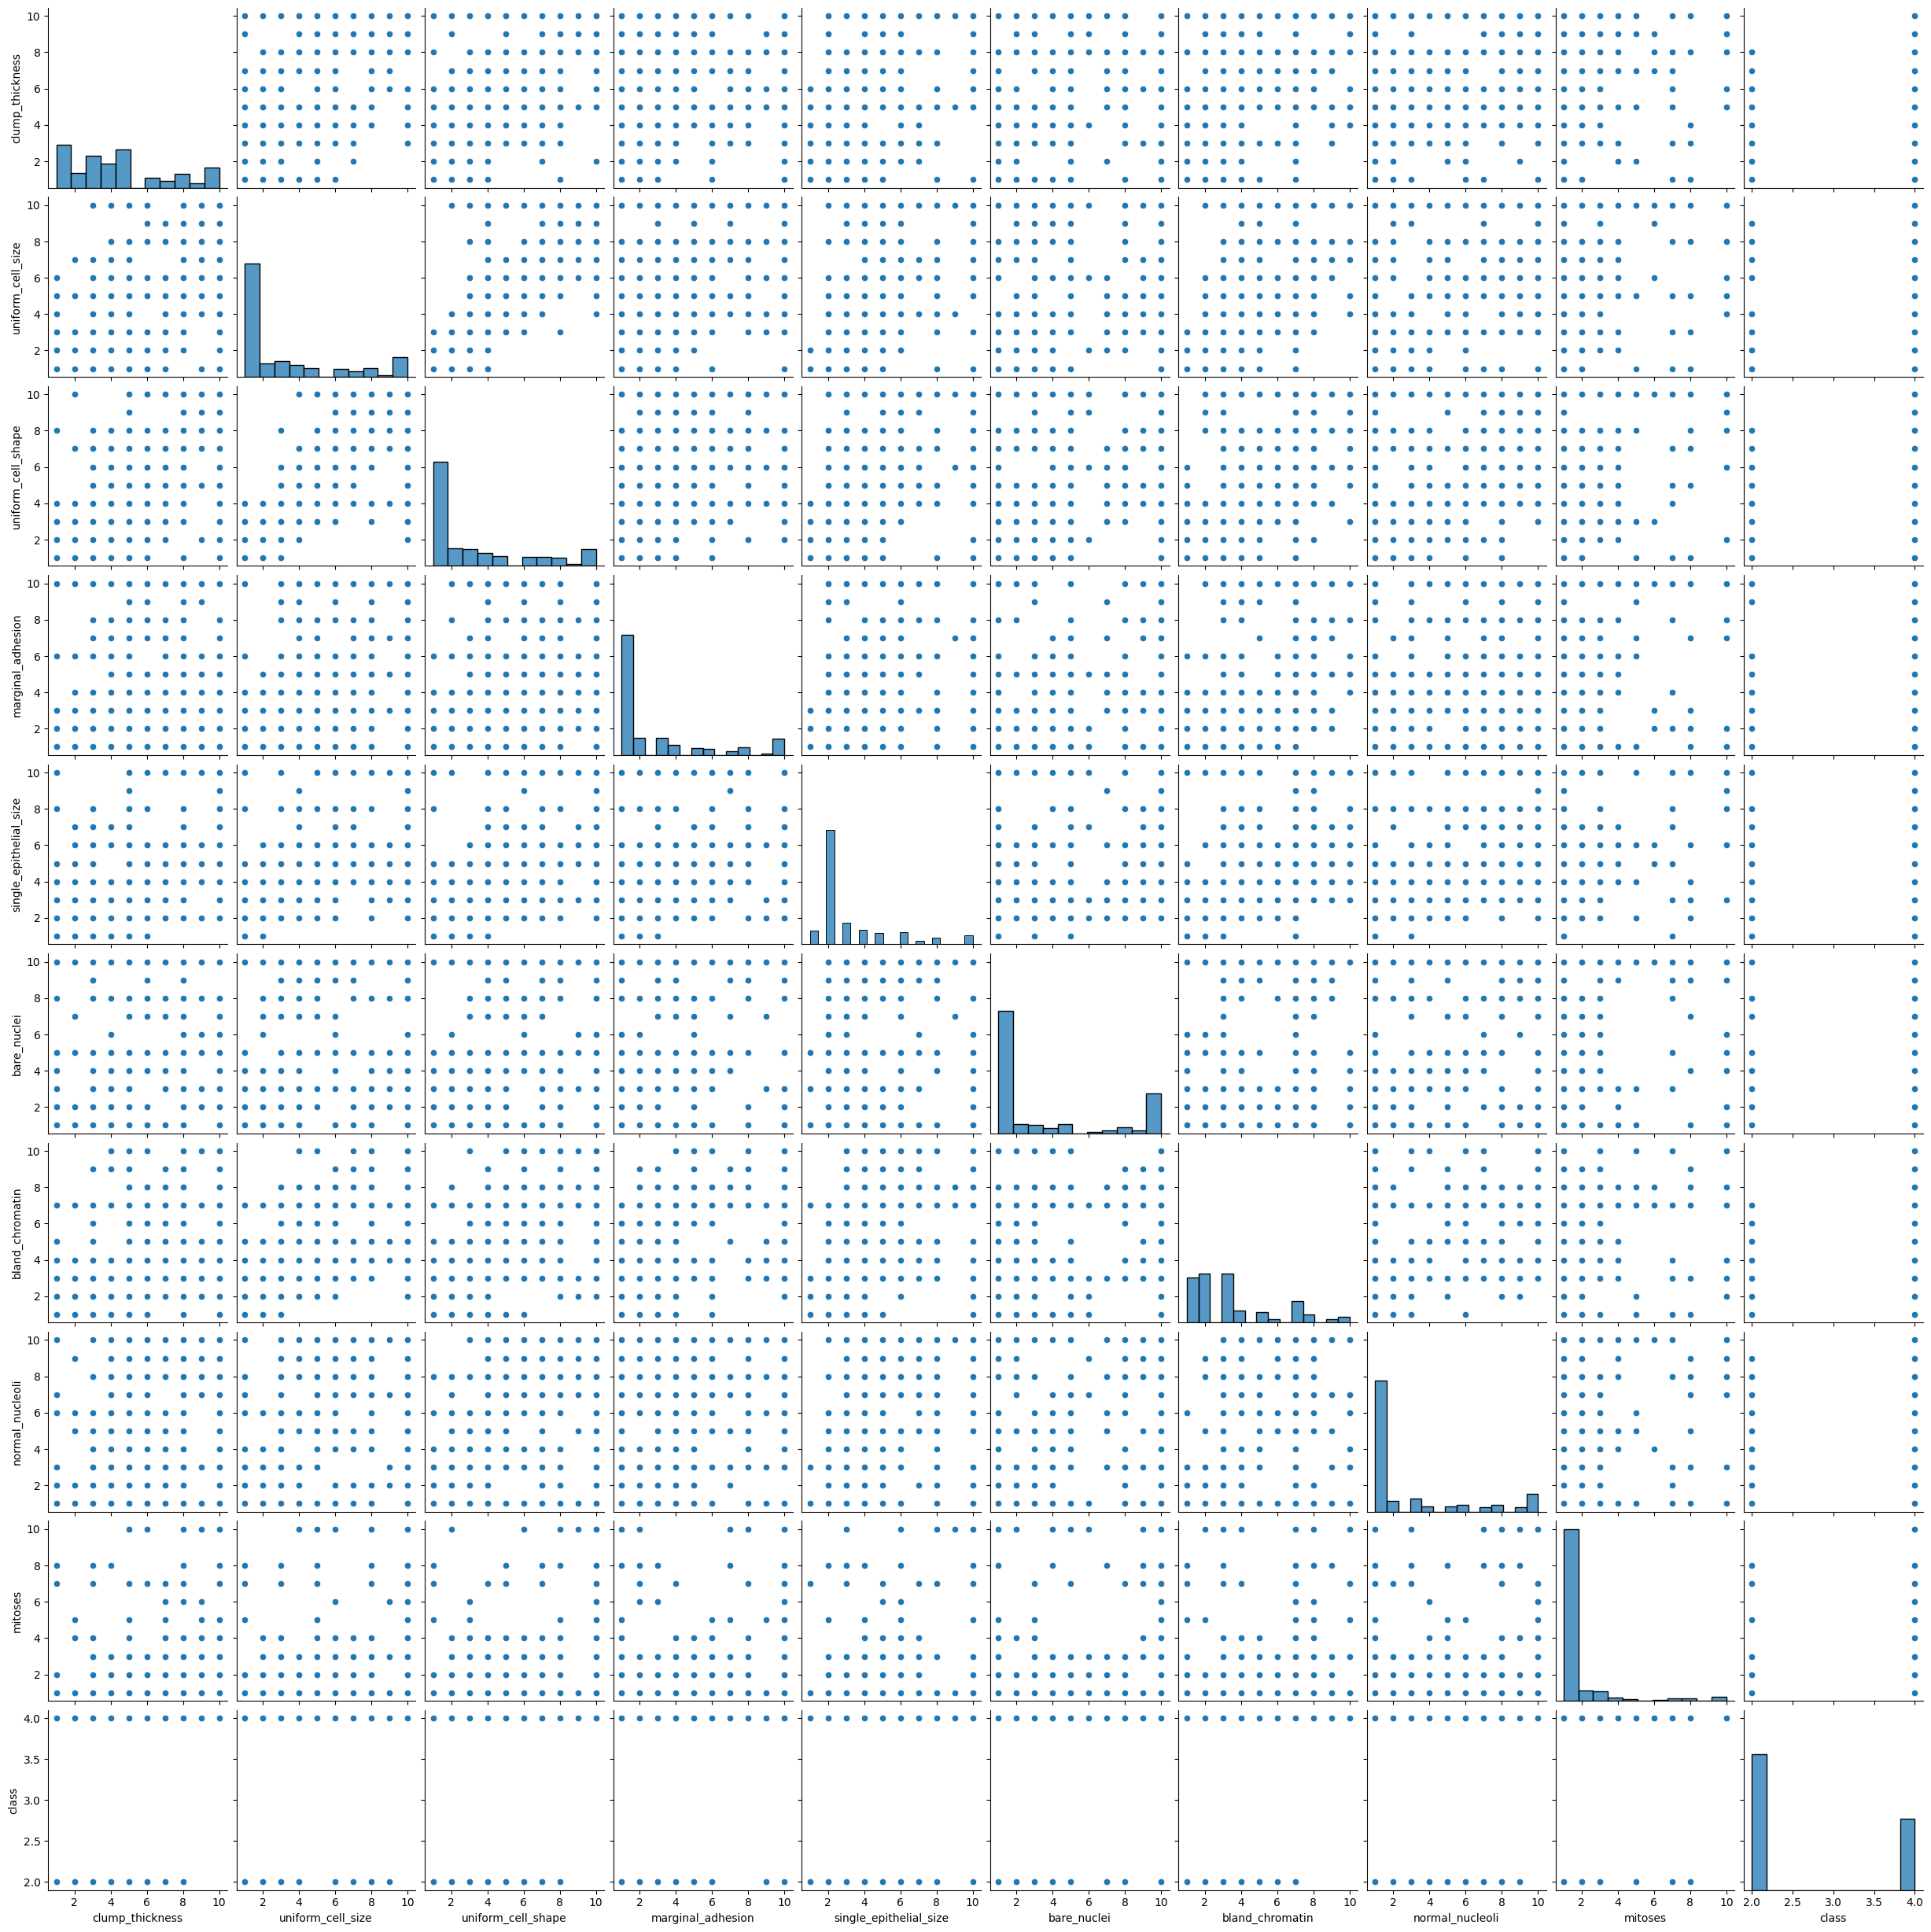

In [27]:
sns.pairplot(data=df)

<Axes: >

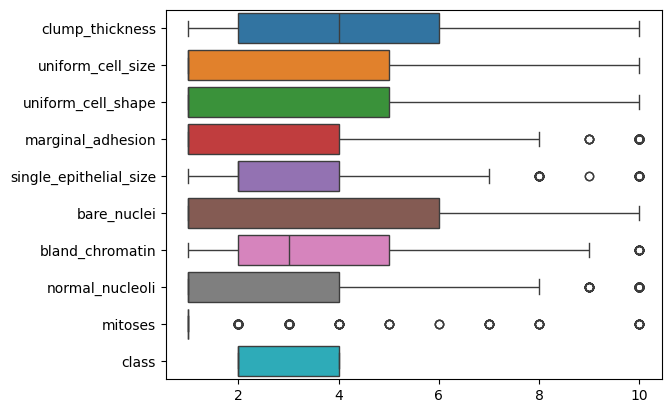

In [33]:
sns.boxplot(data=df,orient="h")

In [34]:
X = df.drop('class', axis=1)
Y = df['class']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [36]:
clf = SVC()

clf.fit(X_train, Y_train)

SVC()

In [37]:
accuracy = clf.score(X_test, Y_test)

In [38]:
accuracy

0.9714285714285714

In [39]:
joblib.dump(clf, 'breast_cancer.joblib')

['breast_cancer.joblib']

In [40]:
with open('breast_cancer.pkl', 'wb') as f:
    pickle.dump(clf, f)